In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import random
################# REFERENCE 1: https://benalexkeen.com/k-means-clustering-in-python/ ################
################# REFERNCE 2: https://youtu.be/9991JlKnFmk ###################

In [2]:
data=pd.read_csv("C:/Users/tirufamily/Desktop/ML/OldFaithfulData.csv")
data.head()


,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [3]:
#X=df.DataFrame(data["eruptions"])
#Y=df.DataFrame(data["waiting"])
#df = pd.DataFrame(data, columns = ['eruptions', 'waiting'])
#df

In [14]:
#from sklearn import preprocessing
#data_scaled=preprocessing.scale(X)
#data_scaled
#df = pd.DataFrame(data_scaled, columns = ['eruptions', 'waiting'])
#df
import statistics
from statistics import mean
from statistics import stdev
mean = np.mean(data)
std = np.std(data)

df=(data-mean)/std  ##standardizing for using it in K means clustering
df


,eruptions,waiting
0,0.098499,0.597123
1,-1.481459,-1.245181
2,-0.135861,0.228663
3,-1.057503,-0.655644
4,0.917443,1.039277
...,...,...
267,0.552298,0.744508
268,-1.174245,-1.834719
269,0.815624,1.407737
270,-1.466537,-1.834719


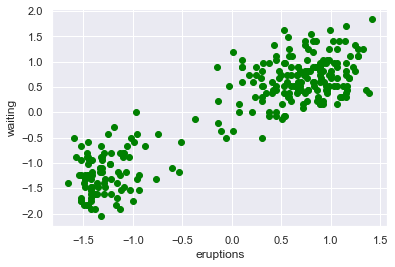

In [12]:
#visualising data points

plt.scatter(df["eruptions"],df["waiting"],color="green")
plt.xlabel("eruptions")
plt.ylabel("waiting")
plt.show()

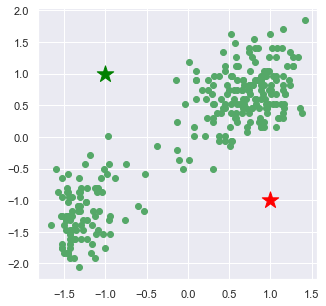

In [6]:
col_num = 1
dict = {}
count = 0
k=2
centroids={1:[1,-1],2:[-1,1]}
fig = plt.figure(figsize=(5, 5))
plt.scatter(df["eruptions"],df["waiting"],color = 'g')
colmap={2:'green',1:'red'}
#clus_shape={2:'o',1:'x'}
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i] , marker = '*' , s = 300)
fig.savefig('figure_{}.pdf'.format(col_num), dpi=fig.dpi)
col_num+=1
plt.show()

   eruptions   waiting  distance_from_1  distance_from_2  closest  color
0   0.098499  0.597123         1.833987         1.170047        2  green
1  -1.481459 -1.245181         2.493542         2.296223        2  green
2  -0.135861  0.228663         1.673258         1.158316        2  green
3  -1.057503 -0.655644         2.086121         1.656642        2  green
4   0.917443  1.039277         2.040947         1.917846        2  green


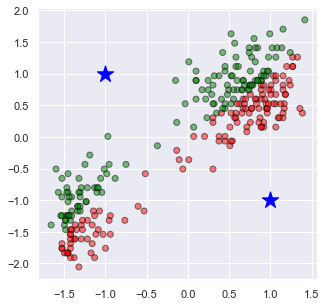

In [7]:
def assignment(df, centroids):
    global count
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (np.sqrt((df['eruptions'] - centroids[i][0]) ** 2
                                                    + (df['waiting'] - centroids[i][1]) ** 2))
    
    error = {count:df[["distance_from_1","distance_from_2"]].min(axis = 1).sum()}
    dict.update(error)
    count+=1
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['eruptions'], df['waiting'], color=df['color'], alpha=0.5, edgecolor='black')
for i in centroids.keys():
     plt.scatter(*centroids[i], color=['blue'] ,marker='*',s = 300)
plt.show()
fig.savefig('figure_{}.pdf'.format(col_num), dpi=fig.dpi)  
col_num+=1

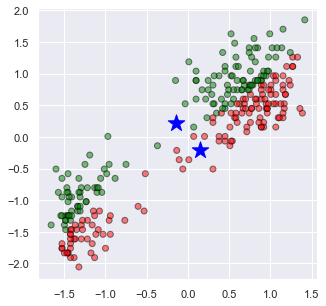

In [8]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['eruptions'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['waiting'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['eruptions'], df['waiting'], color=df['color'], alpha=0.5, edgecolor='black')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=['blue'] , marker = '*' , s =300)
fig.savefig('figure_{}.pdf'.format(col_num), dpi=fig.dpi)  
col_num+=1
plt.show()

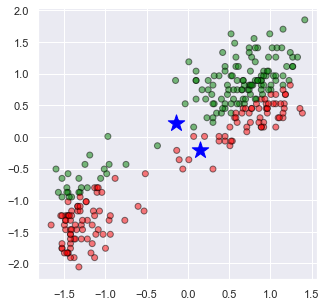

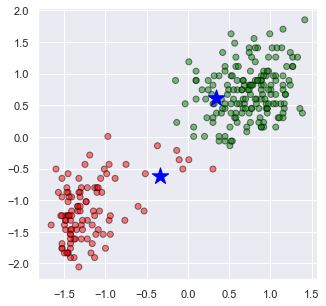

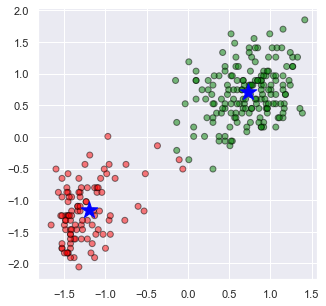

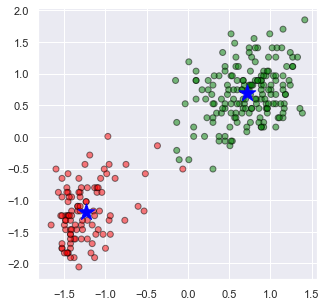

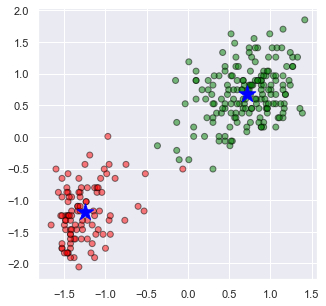

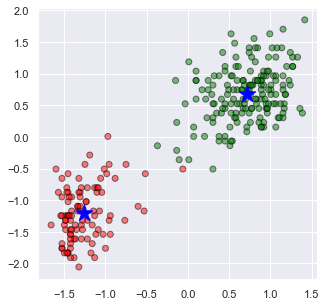

     eruptions   waiting  distance_from_1  distance_from_2  closest  color
0     0.098499  0.597123         2.254116         0.616369        2  green
1    -1.481459 -1.245181         0.225629         2.914617        1    red
2    -0.135861  0.228663         1.819186         0.956952        2  green
3    -1.057503 -0.655644         0.582299         2.213205        1    red
4     0.917443  1.039277         3.124582         0.417834        2  green
..         ...       ...              ...              ...      ...    ...
267   0.552298  0.744508         2.659312         0.171372        2  green
268  -1.174245 -1.834719         0.638944         3.139540        1    red
269   0.815624  1.407737         3.334223         0.738627        2  green
270  -1.466537 -1.834719         0.665960         3.323172        1    red
271   0.859512  0.228663         2.557000         0.472462        2  green

[272 rows x 6 columns]


In [9]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    fig = plt.figure(figsize=(5, 5))
    plt.scatter(df['eruptions'], df['waiting'], color=df['color'], alpha=0.5, edgecolor='black')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=['blue'] , marker = '*' , s = 300)
    plt.show()
    fig.savefig('figure_{}.pdf'.format(col_num), dpi=fig.dpi)  
    col_num+=1
    if closest_centroids.equals(df['closest']):
        break

print(df)